## Programming for Artificial Intelligence and Data Science 

The aim of this coursework is to implement and test an unsupervised machine-learning algorithm; K-Means clustering. 

The supporting modules used are Numpy, Pandas, Matplotlib and Random

**Algorithm**

1. Scale the data provided 
2. Pick a random centroid from the dataset
3. Assign the labels for each data point. 
4. Update the centroids. 
5. Reiterate until the algorithm converges. 


### Import the necessary modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import random

from IPython.display import clear_output

from IPython.display import Markdown as md

## Task 1 : Datasets to test 

**DATASET 1**: The dataset chosen for the pen & paper calculation for k-means clustering consists of 2 arrays; X and Y. The reason to choose this dataset as suitable for kmeans is because it consists of pairs of X values that fall under within a difference of 10, while there is one value in the array that is the odd one out with a difference larger than 10 from its next value. Presumably, the kmeans clustering algorithm would assign clusters of the (X,Y) with the shortest distance to the centroids. 


**DATASET 2**: The dataset used to test the functions of a K-means clustering algorithm is the iris dataset from scikit learn's built-in data. One of the reasons to use this dataset to test the algorithm is due to the innate clustering behaviour the data possesses. It consists data of 3 plant classes of Iris - setosa, versicolour and virginica. The existence of 3 separate classes could give rise to clusters as predictions for it's features. 



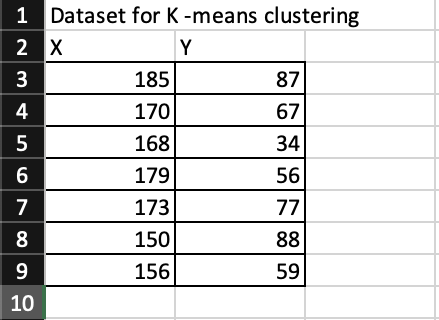

In [2]:
# dataset pathway for DATASET 2
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

import csv
with open('iris.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(iris.feature_names)
    writer.writerows(iris.data.tolist())

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
#importing the dataset 2 into pandas dataframe
x= iris.data
y= iris.target
df = pd.DataFrame(x, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Task 2: K-means on paper

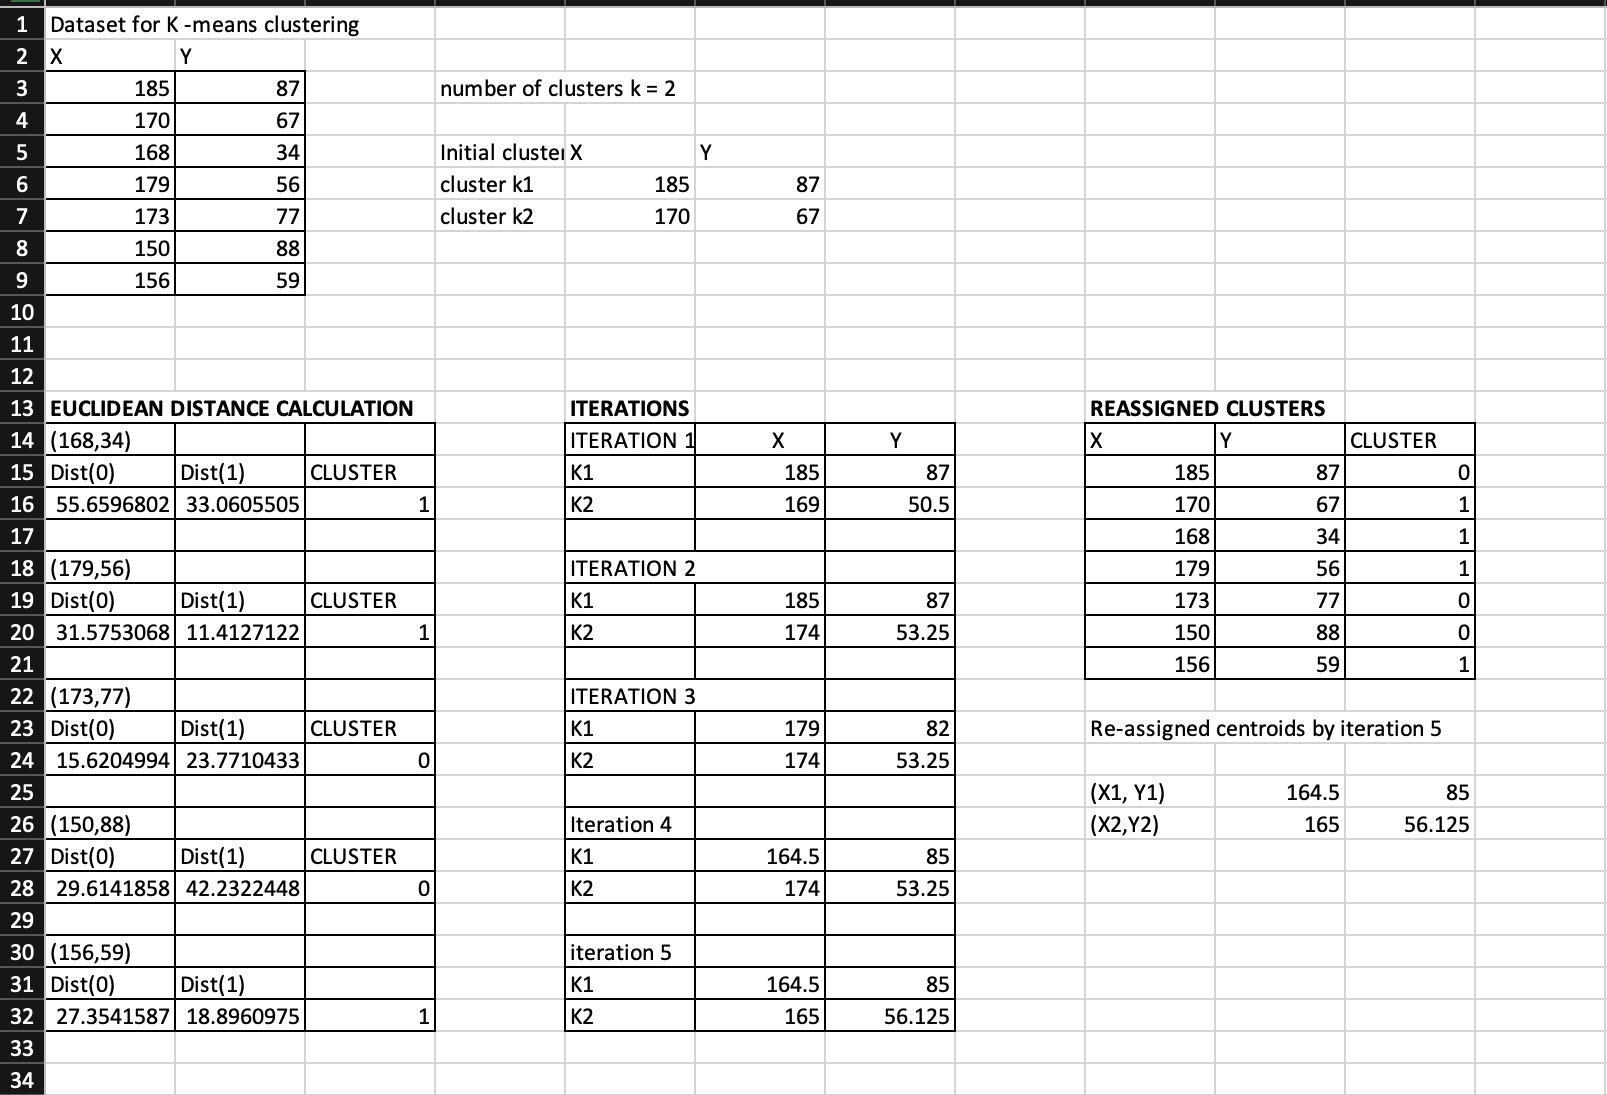


By using sklearn's inbuilt K-means module, we can check the legimitacy of the results obtained by hand. The updated centroids obtained in the calculation above are (164.5, 85), (165,56.125). 

In [4]:
#Sanity check for the results obtained by hand
dict = {'x': [185 ,170, 168, 179, 173, 150, 156],
        'y': [87, 67, 34, 56, 77, 88, 59]}

small_df = pd.DataFrame(dict)

In [5]:
#instantiating the kmeans for the data 'df'
km = KMeans(n_clusters = 2)
km.fit(small_df)

KMeans(n_clusters=2)

In [6]:
#print the updated centroids
print("The updated centroids computed by kmeans are: ", km.cluster_centers_)

#print the labels assigned
small_df['labels'] = pd.DataFrame(km.labels_)
small_df

The updated centroids computed by kmeans are:  [[169.5         79.75      ]
 [167.66666667  49.66666667]]


,x,y,labels
0,185,87,0
1,170,67,0
2,168,34,1
3,179,56,1
4,173,77,0
5,150,88,0
6,156,59,1


From the result obtained using scikit-learn's K-means module, we can see that the centroids differ from the hand-calculations by a difference of 4.5. The label assigned for data point(X2,Y2) is 0 by sklearn while the hand calculation renders it to be 1 (one possibility for such an assignment could be since the data point was chosen as a random initial centroid during hand calculation). 

## Task 3: Test harness using Iris dataset

Test driven development for the functions that lead to obtaining k-means clusters and updated centroids.

1. Scaling the data in cases where the variables are varied, for instance if a variable in the dataset ranges between 1 to 20 and another ranges between 1000-10000. This vast difference in variables could result in misjudged clusters. 
2. The scale_data function below uses min-max normalisation to scale the features within a range of 1 to 10, so the algorithm predicts the target on equal-footing. 
3. This is also done primarily/recommended since the K-means algorithm uses distance-based metric to compute the similarity.

In [7]:
#scaling the dataset using min-max. 
#this is d
def scale_data(data):
    '''function to scale the features using min-max normalisaton 
    into a range of 1 to 10
    Args: 
    data : the pandas dataframe to scale'''
    data = (((data - data.min())/(data.max() - data.min())) * 9)+ 1
    return data

In [8]:
#function definition to choose random centroids using the sample() function in pandas. 
#the lambda function iterates through each row in the dataframe to randomly select a centroid 
#using the sample() 
def initial_centroid(data,k):
    ''' function selects an initial centroid randomly
    for the 'k' number of values.
    It appends the centroids to an empty list.
    
    Args:
    
    data: the scaled dataframe
    k: the number of clusters'''
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: int(x.sample()))
        centroids.append(centroid)
        
    return pd.concat(centroids,axis = 1)

In [9]:
def assign_clusters(data,centroids):
    '''This function calculates 
    the distance from the centroid for each data point
    in the dataset
    
    Args: 
    
    data: the scaled dataframe
    centroids : the random centroids obtained
    
    Return: 
    
    distance: a pandas series of minimum distances calculated from the centroids using the Euclidean distance
    similarity measure;
    where distance.idxmin assigns the data point to the closest cluster with minimum distance'''
    
    distance = centroids.apply(lambda x: (((data - x)**2).sum(axis = 1))**0.5)
    return distance.idxmin(axis=1)
        
    
def new_centroid(data, clusters,k):
    '''This function updates the centroids using the mean()
    
    Args:
    
    data: the scaled dataframe
    clusters: the pandas series cluster labels assigned to the data points
    k : the number of clusters
    
    Return:
    
    new_centroids: a dataframe of the recomputed centroids using mean(), 
    grouped by the assigned cluster labels'''
    
    
    new_centroids = data.groupby(clusters).apply(lambda x: x.mean()).transpose()
    return new_centroids


- Now, since all the primary functions that would render the kmeans centroids have been created, using a principal component analysis is a useful measure. It is one of the dimension reduction techniques used in unsupervised dimension reduction. 
- Using a PCA function is also helpful to visualise the clusters in a scatter plot by using the features in a dataframe that consist of highest variances. 

In [10]:
def PCA(data, n_components):
    
    '''The principal component analysis function calculates the Eigen-values and 
    Eigen vectors in the dataframe input using the covariance matrix (from the data input)
    
    Args:
    
    data: the scaled dataframe 
    n_components: number of principal components to reduce to
    
    Returns: 
    
    X_reduced: Returns a numpy array of dimensions M x N 
    where M - number of rows, N - number of features reduced to'''
    
    #calculate the mean 
    mean = data - np.mean(data, axis = 0)
    
    #covariance matrix for the data
    cov = np.cov(mean, rowvar = False)
    
    #computing the eigen values and eigen vectors for the data
    eigen_val, eigen_vect = np.linalg.eigh(cov)
    
    #sort the eigen values and vectors 
    sorted_index = np.argsort(eigen_val)[::-1]
    sorted_eigenvalue = eigen_val[sorted_index]
    sorted_eigenvectors = eigen_vect[:,sorted_index]
     
    #Select a subset from the eigenvector
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]
     
    #Transforming the data 
    X_reduced = np.dot(eigenvector_subset.transpose() , mean.transpose()).transpose()
     
    return X_reduced
    

Testing the functions using python's unittest module. The test below uses a random.seed() function to return the same output since the K-means algorithm has the unique ability to reassign clusters everytime it is run.
The class for test below tests all the functions individually using the Iris dataset and returns the test report 'OK' and the time taken to run the test. If the values do not match the input, it may give rise to an assertion error.

In [11]:
import unittest

np.random.seed(3)
mu = initial_centroid(df,k = 3)
cluster_labels = assign_clusters(df,mu)
updated_mu = new_centroid(df,cluster_labels,k=3)
#variable for initial centroid
mu_1 = initial_centroid(df,k=3).iloc[0,0]
mu_2 = initial_centroid(df,k=3).iloc[1,1]
#variable for assigned cluster labels for the nearest distance
label1 = cluster_labels[149]
label2 = cluster_labels[100]
#new centroids
new_mu_1 = updated_mu.iloc[0,0].round(3)
new_mu_2 = updated_mu.iloc[1,1].round(3)
#principal components 
pca_comp = PCA(df,2)
pca_1 = pca_comp[1]
pca_2 = pca_comp[57]

class test_kmeans(unittest.TestCase):
    
    
    def test_scale_data(self):
        
        
        self.assertEqual(scale_data(df).iloc[:,0].max(),10)
        self.assertEqual(scale_data(df).iloc[:,1].max(),10)
        self.assertEqual(scale_data(df).iloc[:,2].max(),10)
        self.assertEqual(scale_data(df).iloc[:,3].max(),10)
        
        
        self.assertEqual(scale_data(df).iloc[:,0].min(),1)
        self.assertEqual(scale_data(df).iloc[:,1].min(),1)
        self.assertEqual(scale_data(df).iloc[:,2].min(),1)
        self.assertEqual(scale_data(df).iloc[:,3].min(),1)
        
        
    def test_initial_centroid(self):
        
        self.assertEqual(initial_centroid(df,k =3).iloc[0,0],mu_1)
        self.assertEqual(initial_centroid(df,k = 3).iloc[1,1],mu_2)
        self.assertEqual(type(initial_centroid(df,k=3)),pd.DataFrame)
    
    def test_assign_clusters(self):
        
        self.assertEqual(assign_clusters(df,mu)[149],label1)
        self.assertEqual(assign_clusters(df,mu)[100],label2)
        self.assertEqual(type(assign_clusters(df,mu)),pd.Series)
        
        
    def test_new_centroids(self):
        
        self.assertEqual(new_centroid(df,cluster_labels,k=3).iloc[0,0].round(3),new_mu_1)
        self.assertEqual(new_centroid(df,cluster_labels,k=3).iloc[1,1].round(3),new_mu_2)
        self.assertEqual(type(new_centroid(df,cluster_labels,k=3)),pd.DataFrame)
        
        
    def PCA(self):
        
        self.assertEqual(PCA(df,n_components = 2)[1], pca_1)
        self.assertEqual(PCA(df,n_components = 2)[57], pca_2)
        self.assertEqual(type(PCA(df,n_components = 2)),pd.Series)
        
    
        
if __name__ == '__main__':
    
    unittest.main(argv=['this-is-ignored'], exit=False)        
    


....
----------------------------------------------------------------------
Ran 4 tests in 0.026s

OK


## Task 4: Implementation using Iris dataset

The K-means clustering implementation is done on the Iris dataset (the same one as the dataset used in testing) to visualise the cluster formation. 
We would use a loop to iterate through the dataframe that gradually updates the centroids to convergence. By plotting the cluster formation using a loop, we can visualise how the centroids change its course using the K-means algorithm. 

The PCA() function defined in the previous task assists in computing the principal components, essentially to plot the dataset with its corresponding labels. Doing so would not require us to filter out features from the dataset manually (which may not be a recommended solution). 

The function defined below; plot() uses the PCA() functionality to reduce the features and plot the clusters. 

In [12]:
def plot(data, labels, centroids,n_components):
    '''function to plot clusters for 2 dimensional data
    
    Args:
    
    data : the scaled dataframe
    labels: assigned cluster labels for each datapoint
    centroids: the  centroids for the clusters
    n_components: number of components to computer the principal component analysis
    
    Return: 
    
    A scatter plot that uses matplotlib module to display the clusters using colours
    green,purple and blue for the corresponding cluster labels'''
    
    data_2dim = PCA(data,n_components)
    centroids_2d = PCA(centroids.T,n_components)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    #plt.scatter(x=data_2dim[:,0], y=data_2dim[:,1], c=labels)
    plt.scatter(x=data_2dim[labels == 0,0], y=data_2dim[labels == 0,1], c='green',label = 'cluster 0')
    plt.scatter(x= data_2dim[labels == 1,0], y = data_2dim[labels == 1,1], c = 'purple', label = 'cluster 1')
    plt.scatter(x= data_2dim[labels == 2,0], y = data_2dim[labels == 2,1], c = 'blue', label = 'cluster 2')
    plt.scatter(centroids_2d[:,0], centroids_2d[:,1], marker='*', s=300,
            c='r', label='centroid') 
    plt.legend(loc = 'upper right')
    plt.show()
    

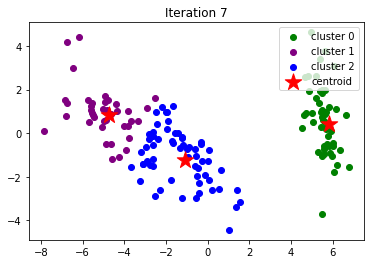

By plotting the clusters using the K-means algorithm we can see that the iteration stops at 8. This is the point of convergence.

In [14]:
k= 3 #number of clusters
max_iteration = 100 #number of iterations to run through 
data = scale_data(df) 
centroids = initial_centroid(data,k)
old_centroids = pd.DataFrame() #old_centroids is an empty dataframe to store the random centroids during the loop 

#Number of principal components
n_components = 2
iteration = 1
# a while loop to iterate until convergence 
while iteration < max_iteration and not  centroids.equals(old_centroids):
    
        old_centroids = centroids
        labels = assign_clusters(data,centroids)
        centroids = new_centroid(data,labels,k)
        plot(data,labels,centroids,n_components)
        iteration += 1
    
       #return centroids   
md("By plotting the clusters using the K-means algorithm we can see that the iteration stops at {}. This is the point of convergence.".format(iteration))

### Task 4a - Sanity check using Sklearn.clusters.KMeans

To compare the results obtained by the K-means algorithm above, we can use scikit-learn's K-means module. This would assist us in performing sanity checks, alongside analysing the difference in clusters. 

In [15]:
#creating the list of names for the columns 
features_sk = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)","petal width (cm)"]

In [16]:
#instantiating the KMeans module with 3 clusters 
#fit the scaled data 
km_iris = KMeans(n_clusters = 3)
km_iris.fit(data)

KMeans(n_clusters=3)

In [17]:
#obtain the cluster centers from the km_iris to compare
centroids_sk = km_iris.cluster_centers_

centroids_sk = pd.DataFrame(centroids_sk, columns = features_sk).T
centroids_sk

,0,1,2
sepal length (cm),4.971311,2.765000,7.365385
sepal width (cm),3.766393,6.355000,5.057692
petal length (cm),6.181439,1.704746,8.173403
petal width (cm),5.942623,1.547500,8.423077


In [18]:
#the centroids obtained by using the kmeans functions defined
centroids

,0,1,2
sepal length (cm),2.765000,7.365385,4.971311
sepal width (cm),6.355000,5.057692,3.766393
petal length (cm),1.704746,8.173403,6.181439
petal width (cm),1.547500,8.423077,5.942623


From the comparison above between centroids obtained by using the K-means implementation and the scikit-learn module:

- It is evident that there is cluster centroids have calculated the exact same values but had misjudged the cluster labels. 

However, this does not imply that the clusters are misjudged at all times. 

## Task 5: Conclusion Visualising the clusters 

In [19]:
#Actual labels 
data_actual = data.copy()
data_actual['actual_labels'] = y
data_actual

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_labels
0,3.00,6.625,1.610169,1.375,0
1,2.50,4.750,1.610169,1.375,0
2,2.00,5.500,1.457627,1.375,0
3,1.75,5.125,1.762712,1.375,0
4,2.75,7.000,1.610169,1.375,0
...,...,...,...,...,...
145,7.00,4.750,7.406780,9.250,2
146,6.00,2.875,7.101695,7.750,2
147,6.50,4.750,7.406780,8.125,2
148,5.75,6.250,7.711864,9.250,2


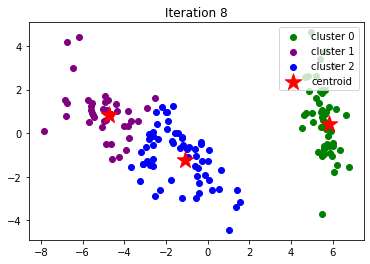

In [20]:
#plotting the centroids obtained from the implementation
plot(data,labels,centroids,n_components)

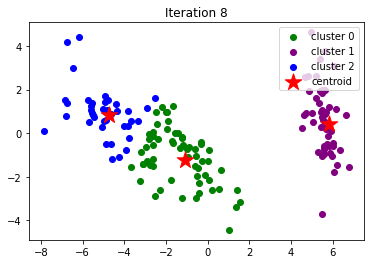

In [21]:
#plotting the centroids obtained from scikit-learn 
plot(data, km_iris.labels_,centroids_sk,n_components)

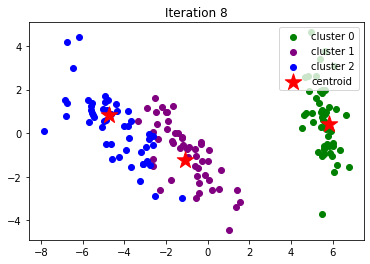

In [22]:
#plotting the clusters of the actual labels
plot(data, y, centroids, n_components)

From the scatter plots above, the comparison amongst the 3 plots shows that neither implementations have been perfect; Kmeans functions and sklearn. The kmeans functions has judged cluster 0 perfectly whereas Scikit-learn has judge cluster 2 perfectly. By running the algorithm multiple times, the results may render perfect, but not at all times. 